1. We use violin diagrams to study the distribution of WeChat red envelope amounts

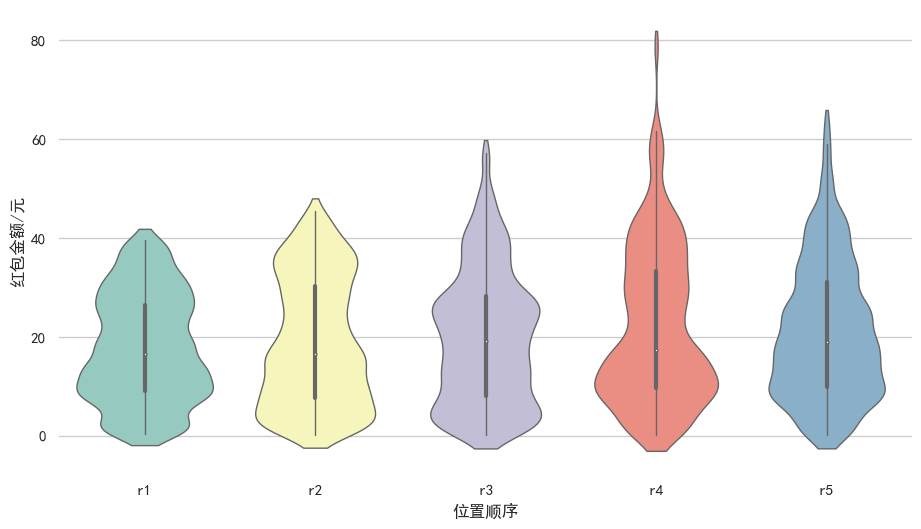

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd;
sns.set(style="whitegrid")
# 以下两句防止中文显示为窗格
plt.rcParams["font.sans-serif"]=["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

# 导入数据，从excel中

df = pd.read_excel('微信红包统计.xlsx')

# 设置窗口的大小
f, ax = plt.subplots(figsize=(11, 6))

# 绘制小提琴图
sns.violinplot(data=df, palette="Set3", bw=.2, cut=1, linewidth=1)

# 设置轴显示的范围
#ax.set(ylim=(-.7, 1.05))
# 去除上下左右的边框（默认该函数会取出右上的边框）
sns.despine(left=True, bottom=True)
plt.xlabel('位置顺序')
plt.ylabel('红包金额/元')
plt.show()

2. We use the ks test to determine the amount distribution function of the first one who grab the red packets.

In [9]:
import numpy as np
from scipy import stats
from scipy.stats import anderson
 
df = pd.read_excel('微信红包统计.xlsx')
data = df['r1'] 
 
# 执行K-S检验
ks_statistic, ks_p_value = stats.kstest(data, 'uniform',args=(0, 40))

# 打印结果
print("K-S统计量 (D) =", ks_statistic)
print("p值 (p) =", ks_p_value)
 
# 设置显著性水平
alpha = 0.05
 
# 根据p值进行假设检验
if ks_p_value < alpha:
    print("拒绝原假设：数据不服从假设分布")
else:
    print("接受原假设：数据服从假设分布")
    

K-S统计量 (D) = 0.11074999999999996
p值 (p) = 0.03647342758058769
拒绝原假设：数据不服从假设分布


By observing the cumulative distribution function image of red packets, we can more intuitively determine that the function follows a uniform distribution

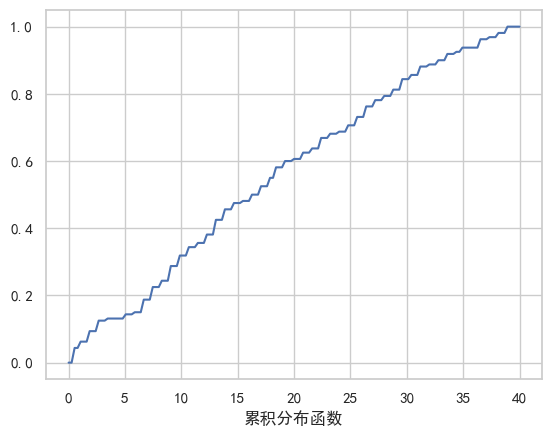

In [10]:
import numpy as np                          #导入numpy
def Fn(x, sample, m):                       #定义函数Fn
    n=sample.size                           #样本容量n
    f, b=np.histogram(sample, bins=m)       #计算样本分组及频数
    f=f/n                                   #计算各组频率
    for k in range(m-1):                    #计算累积频率
        f[k+1]+=f[k]
    y=np.zeros(x.size)                      #函数值初始化为0
    for i in range(1, m):                   #计算每个分组区间内的函数值
        d=np.where((x>b[i-1])&(x<=b[i]))
        y[d]=f[i-1]
    d=np.where(x>b[m-1])                    #计算最后小区间及其以后的函数值
    y[d]=1
    return y                                #返回y


import numpy as np                                          #导入numpy
from matplotlib import pyplot as plt                        #导入绘图对象plt
sample=df['r1']
x=np.linspace(0, 40, 151)                                #设置绘图横轴
plt.plot(x,Fn(x, sample, 50)) 
plt.xlabel('累积分布函数')
plt.show()


3. Through the Kruskall Wallis test, we found that the red envelope amounts of others also follow a uniform distribution.

In [11]:
from scipy import stats
import numpy as np                                          #导入numpy
sample1=df['r1']
sample2 =df['r2']
sample3 =df['r3']
sample4 =df['r4']
sample5 =df['r5']
# 将所有样本放入一个列表中，并将对应的组标签放入另一个列表中
samples = [sample1, sample2, sample3, sample4,sample5]
group_labels = ['Order 1', 'Order 2', 'Order 3','Order 4','Order 5']

# 执行Kruskal-Wallis检验
h_statistic, p_value = stats.kruskal(*samples)

print(f"Kruskal-Wallis H statistic: {h_statistic}")
print(f"p-value: {p_value}")

# 根据p值判断是否拒绝原假设
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis, at least two groups differ significantly.")
else:
    print("Fail to reject the null hypothesis, the groups may not differ significantly.")

Kruskal-Wallis H statistic: 6.058464937005295
p-value: 0.19482441437716413
Fail to reject the null hypothesis, the groups may not differ significantly.


4. By using the Spearman correlation coefficient, we can see the relationship between the amount of red envelopes snatched by different people.

In [161]:
import pandas as pd
import scipy.stats as stats



# 计算斯皮尔曼相关系数
spearman_corr = df.corr(method='spearman')
print("斯皮尔曼相关系数:\n", spearman_corr)



斯皮尔曼相关系数:
           r1        r2        r3        r4        r5
r1  1.000000 -0.192655 -0.155660 -0.182539 -0.172123
r2 -0.192655  1.000000 -0.344745 -0.359730 -0.021876
r3 -0.155660 -0.344745  1.000000 -0.129615 -0.300081
r4 -0.182539 -0.359730 -0.129615  1.000000 -0.503872
r5 -0.172123 -0.021876 -0.300081 -0.503872  1.000000


5. Based on the range of data distribution (maximum and minimum values of data), make predictions for the model

In [16]:
max(df['r1'])

39.66

In [17]:
max(df['r2'])

45.42

In [14]:
max(df['r3'])

57.11

In [15]:
max(df['r4'])

78.75

In [158]:
max(df['r5'])

63.14

This section is a simulation of WeChat red envelopes。

In [7]:
import random

def luck_money(total, num):
    tmp = num
    for i in range(num-1):       
        hb = round(random.uniform(0.01, total/num*2), 2)
        total = total - hb
        if total <= num*0.01:   
            total = total + hb
            num -= 1
            hb = total - num*0.01
            yield round(hb, 2)
            for j in range(i+1, tmp):   
                yield 0.01
            break                       
        yield hb
        num -= 1
    else:                       
        total = round(total, 2)
        yield total

g = luck_money(100, 5)
for i in g:
    print(i)

39.6
20.41
7.96
7.85
24.18
